In [39]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [40]:
#from source.utils import *
from source.preprocess import *
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from tqdm import tqdm_notebook as tqdm

In [41]:
path = "../../Desktop/DLC_social_1/"
path2 = "../../Desktop/DLC_social_2/"

# Set up and design the project

In [42]:
with open('{}DLC_social_1_exp_conditions.pickle'.format(path), 'rb') as handle:
    Treatment_dict = pickle.load(handle)

In [43]:
#Which angles to compute?
bp_dict = {'B_Nose':['B_Left_ear','B_Right_ear'],
          'B_Left_ear':['B_Nose','B_Right_ear','B_Center','B_Left_flank'],
          'B_Right_ear':['B_Nose','B_Left_ear','B_Center','B_Right_flank'],
          'B_Center':['B_Left_ear','B_Right_ear','B_Left_flank','B_Right_flank','B_Tail_base'],
          'B_Left_flank':['B_Left_ear','B_Center','B_Tail_base'],
          'B_Right_flank':['B_Right_ear','B_Center','B_Tail_base'],
          'B_Tail_base':['B_Center','B_Left_flank','B_Right_flank']}

In [304]:
%%time
DLC_social_1 = project(path=path,#Path where to find the required files
                   smooth_alpha=0.85,                    #Alpha value for exponentially weighted smoothing
                   distances=['B_Center','B_Nose','B_Left_ear','B_Right_ear','B_Left_flank',
                              'B_Right_flank','B_Tail_base'],
                   ego=False,
                   angles=True,
                   connectivity=bp_dict,
                   arena='circular',                  #Type of arena used in the experiments
                   arena_dims=[380],                  #Dimensions of the arena. Just one if it's circular
                   subset_condition="B",
                   video_format='.mp4',
                   table_format='.h5',
                   exp_conditions=Treatment_dict)

CPU times: user 2.61 s, sys: 800 ms, total: 3.41 s
Wall time: 1.14 s


In [404]:
%%time
DLC_social_2 = project(path=path2,#Path where to find the required files
                   smooth_alpha=0.90,                    #Alpha value for exponentially weighted smoothing
                   distances=['B_Center','B_Nose','B_Left_ear','B_Right_ear','B_Left_flank',
                              'B_Right_flank','B_Tail_base'],
                   ego=False,
                   angles=True,
                   connectivity=bp_dict,
                   arena='circular',                  #Type of arena used in the experiments
                   arena_dims=[380],                  #Dimensions of the arena. Just one if it's circular
                   subset_condition="B",
                   video_format='.mp4',
                   table_format='.h5')

CPU times: user 9.54 s, sys: 1.45 s, total: 11 s
Wall time: 2.29 s


# Run project

In [405]:
%%time
DLC_social_1_coords = DLC_social_1.run(verbose=True)
print(DLC_social_1_coords)
type(DLC_social_1_coords)

Loading trajectories...
Smoothing trajectories...
Computing distances...
Computing angles...
Done!
Coordinates of 47 videos across 4 conditions
CPU times: user 7.34 s, sys: 581 ms, total: 7.92 s
Wall time: 7.93 s


source.preprocess.coordinates

In [406]:
%%time
DLC_social_2_coords = DLC_social_2.run(verbose=True)
print(DLC_social_2_coords)
type(DLC_social_2_coords)

Loading trajectories...
Smoothing trajectories...
Computing distances...
Computing angles...
Done!
DLC analysis of 31 videos
CPU times: user 4.83 s, sys: 384 ms, total: 5.21 s
Wall time: 5.22 s


source.preprocess.coordinates

# Generate coords

In [407]:
%%time
ptest = DLC_social_1_coords.get_coords(center="B_Center", polar=False, speed=0, length='00:10:00')
ptest._type

ptest2 = DLC_social_2_coords.get_coords(center="B_Center", polar=False, speed=0, length='00:10:00')
ptest2._type

CPU times: user 1.26 s, sys: 48.1 ms, total: 1.31 s
Wall time: 1.32 s


'coords'

In [408]:
ptest2['Test 13DLC']

bodyparts       B_Left_ear            B_Left_flank                B_Nose  \
coords                   x          y            x          y          x   
00:00:00        -35.205536  37.620239    -3.903473  29.819794 -64.471527   
00:00:00.040005 -35.205536  37.620239    -3.903473  29.819794 -64.471527   
00:00:00.080010 -35.338004  37.465195    -4.019846  29.838031 -64.399429   
00:00:00.120016 -35.200839  37.456021    -4.368222  30.057867 -64.392041   
00:00:00.160021 -35.240563  37.447246    -4.141236  29.928157 -64.385545   
...                    ...        ...          ...        ...        ...   
00:09:59.799973  16.596216 -29.233944    -4.415812 -23.476344  39.455130   
00:09:59.839978  16.196432 -29.275083    -4.425490 -23.693198  39.419487   
00:09:59.879983  16.106410 -29.438307    -4.513719 -23.720485  39.467800   
00:09:59.919989  16.154198 -29.610807    -4.879281 -23.608089  39.721632   
00:09:59.959994  16.500672 -29.798241    -4.710291 -23.416772  40.347685   

bodyparts                  B_Right_ear            B_Right_flank            \
coords                   y           x          y             x         y   
00:00:00         31.364624  -45.079285  16.857147    -24.695648 -1.085846   
00:00:00.040005  31.364624  -45.079285  16.857147    -24.695648 -1.085846   
00:00:00.080010  30.870020  -44.990515  16.926718    -24.632339 -1.009244   
00:00:00.120016  30.940030  -44.902817  16.848825    -24.553897 -1.079501   
00:00:00.160021  30.892739  -44.967768  16.991985    -24.559431 -0.986642   
...                    ...         ...        ...           ...       ...   
00:09:59.799973 -28.006730   29.929880 -14.385750     29.261573  0.463075   
00:09:59.839978 -28.380804   29.743943 -14.516991     29.283121  0.281757   
00:09:59.879983 -28.369759   29.731060 -14.520895     29.330025  0.297098   
00:09:59.919989 -28.524452   29.754475 -14.564033     29.192242  0.228264   
00:09:59.959994 -29.738346   30.146402 -14.644479     29.326406  0.455320   

bodyparts       B_Tail_base             
coords                    x          y  
00:00:00          20.006744 -32.650421  
00:00:00.040005   20.006744 -32.650421  
00:00:00.080010   19.988644 -32.702469  
00:00:00.120016   19.987381 -32.738779  
00:00:00.160021   19.980270 -32.734535  
...                     ...        ...  
00:09:59.799973  -11.814102  32.915553  
00:09:59.839978  -11.808250  32.618499  
00:09:59.879983  -11.903435  32.627221  
00:09:59.919989  -11.300964  32.193961  
00:09:59.959994  -12.163131  32.691621  

[14998 rows x 12 columns]

In [409]:
%%time
dtest = DLC_social_1_coords.get_distances(speed=0, length='00:10:00')
dtest._type

dtest2 = DLC_social_2_coords.get_distances(speed=0, length='00:10:00')
dtest2._type

CPU times: user 79 ms, sys: 38.6 ms, total: 118 ms
Wall time: 117 ms


'dists'

In [410]:
%%time
atest = DLC_social_1_coords.get_angles(degrees=True, speed=0, length='00:10:00')
atest._type

atest2 = DLC_social_2_coords.get_angles(degrees=True, speed=0, length='00:10:00')
atest2._type

CPU times: user 264 ms, sys: 148 ms, total: 412 ms
Wall time: 412 ms


'angles'

# Visualization playground

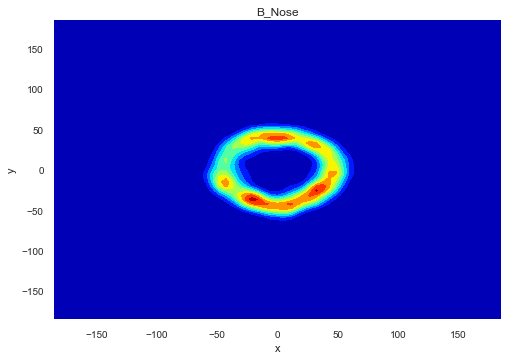

In [413]:
ptest.plot_heatmaps(['B_Nose'], i=2)

In [ ]:
#Plot animation of trajectory over time with different smoothings
#plt.plot(ptest['Day2Test13DLC']['B_Center'].iloc[:5000]['x'],
#         ptest['Day2Test13DLC']['B_Center'].iloc[:5000]['y'], label='alpha=0.85')

#plt.xlabel('x')
#plt.ylabel('y')
#plt.title('Mouse Center Trajectory using different exponential smoothings')
#plt.legend()
#plt.show()

# Dimensionality reduction playground

In [ ]:
#pca = ptest.pca(4, 1000)

In [ ]:
#plt.scatter(*pca[0].T)
#plt.show()

# Preprocessing playground

In [ ]:
mtest = merge_tables(
                      DLC_social_1_coords.get_coords(center=True, polar=True, length='00:10:00'),
                      #DLC_social_1_coords.get_distances(speed=0, length='00:10:00'),
                      #DLC_social_1_coords.get_angles(degrees=True, speed=0, length='00:10:00'),
                    )

In [ ]:
mtest2 = merge_tables(
                      DLC_social_2_coords.get_coords(center=True, polar=True, length='00:10:00'),
                      #DLC_social_2_coords.get_distances(speed=0, length='00:10:00'),
                      #DLC_social_2_coords.get_angles(degrees=True, speed=0, length='00:10:00'),
                    )

In [ ]:
#pptest = mtest.preprocess(window_size=51, filter='gaussian', sigma=10, shift=20)

In [ ]:
pttest = mtest.preprocess(window_size=11, window_step=10, filter="gaussian", sigma=10,
                          shift=0, standard_scaler=True)
pttest.shape

In [ ]:
pttest2 = mtest2.preprocess(window_size=11, window_step=1, filter="gaussian", sigma=55,
                            shift=0, standard_scaler=True)
pttest2.shape

In [ ]:
pttest3 = mtest2.preprocess(window_size=11, window_step=1, filter="gauss", sigma=100,
                            shift=0, standard_scaler=True)
pttest3.shape

In [ ]:
plt.plot(pttest2[2,:,3], label='gaussian')
plt.plot(pttest3[2,:,3], label='normal')
plt.legend()
plt.show()

# Trained models playground

### Seq 2 seq Variational Auto Encoder

In [ ]:
from datetime import datetime
import tensorflow.keras as k
import tensorflow as tf

In [ ]:
NAME = 'Baseline_AE_512_wu10_slide10_gauss_fullval'
log_dir = os.path.abspath(
    "logs/fit/{}_{}".format(NAME, datetime.now().strftime("%Y%m%d-%H%M%S"))
)
tensorboard_callback = k.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
from source.models import SEQ_2_SEQ_AE, SEQ_2_SEQ_GMVAE

In [ ]:
encoder, decoder, ae = SEQ_2_SEQ_AE(pttest.shape).build()
ae.build(pttest.shape)

In [ ]:
ae.summary()

In [ ]:
encoder, generator, grouper, gmvaep, kl_warmup_callback, mmd_warmup_callback = SEQ_2_SEQ_GMVAE(pttest.shape,
                                                                               loss='ELBO+MMD',
                                                                               number_of_components=5,
                                                                               kl_warmup_epochs=10,
                                                                               mmd_warmup_epochs=10,
                                                                               encoding=8,
                                                                               predictor=False).build()
gmvaep.build(pttest.shape)

In [ ]:
#gmvaep.summary()

In [ ]:
tf.keras.utils.plot_model(gmvaep, show_shapes=True)

In [ ]:
#lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#    lambda epoch: 1e-3 * 10**(epoch / 20))

In [ ]:
# tf.config.experimental_run_functions_eagerly(False)
# history = ae.fit(x=pttest[:-1], y=[pttest[:-1],pttest[1:]], epochs=100, batch_size=512, verbose=1,
#                    validation_data=(pttest2[:-1], [pttest2[:-1],pttest2[1:]]),
#                    callbacks=[tensorboard_callback])

In [ ]:
# #GMVAEP witout prediction
#tf.config.experimental_run_functions_eagerly(False)
# history = gmvaep.fit(x=pttest[:-1], y=pttest[:-1], epochs=100, batch_size=512, verbose=1,
#                   validation_data=(pttest2[:-1], pttest2[:-1]),
#                   callbacks=[tensorboard_callback, kl_warmup_callback, mmd_warmup_callback])

In [ ]:
gmvaep.summary()

In [ ]:
# GMVAEP with prediction
# tf.config.experimental_run_functions_eagerly(False)
# history = gmvaep.fit(x=pttest[:-1], y=[pttest[:-1],pttest[1:]], epochs=100, batch_size=512, verbose=1,
#                      validation_data=(pttest2[:-1], [pttest2[:-1],pttest2[1:]]),
#                      callbacks=[tensorboard_callback, kl_warmup_callback, mmd_warmup_callback])

## Encoding interpretation playground

In [ ]:
#The main goal of this section is to explore how to retrieve a given set of frames from the corresponding video

In [ ]:
interpret = pd.read_hdf("./visualizations/dash_data_1.h5")
interpret = interpret.astype(float)
interpret

In [ ]:
confidence = interpret.confidence[interpret.epoch]

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(interpret.loc[interpret["epoch"] > 1], x="confidence", animation_frame="epoch")

fig.show()

In [ ]:
fig = px.histogram(
    data_frame=interpret,
    x="confidence",
    animation_frame="epoch",
    labels={"confidence": "Confidence in best cluster"},
    width=550,
    height=500,
    color_discrete_sequence=px.colors.qualitative.T10,
)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1
fig.update_xaxes(showgrid=True, range=[-0.05, 1.05])

fig.update_layout({"paper_bgcolor": "rgba(0, 0, 0, 0)"})

# Post clustering analysis playground

In [1]:
# Adjusted Rand Index (ARI) for subsequent clustering rounds (how stable are the retrieved clusters?)

In [414]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score

In [437]:
labels = pd.read_csv("./DeepOF_cluster_assignments_across_5_runs_20200714-164723.csv", index_col=0)
labels.head()

,0,1,2,3,4
0,2,1,1,3,0
1,2,1,1,3,0
2,2,1,1,3,3
3,2,1,1,3,3
4,2,2,1,3,3


In [429]:
from itertools import combinations

In [438]:
ari_dist = []
for i in combinations(range(5), 2):
    ari_dist.append(adjusted_rand_score(labels[str(i[0])], labels[str(i[1])]))

In [439]:
import matplotlib.pyplot as plt
import seaborn as sns

In [440]:
ari_dist

[0.4262931604784681,
 -0.03901352418549313,
 0.13322282121451462,
 0.0703731378090514,
 -0.014999275267537037,
 0.06286294192461284,
 0.15631251975391805,
 0.011290437663969472,
 0.263531841144154,
 0.22767276953679622]

In [442]:
for i in range(5):
    print(Counter(labels[str(i)]))

Counter({0: 43116, 2: 22103, 3: 3331, 1: 1954})
Counter({0: 39741, 1: 16014, 3: 9382, 2: 5367})
Counter({1: 57650, 0: 11463, 2: 1133, 3: 258})
Counter({3: 41117, 2: 27463, 1: 1880, 0: 44})
Counter({0: 40812, 2: 18337, 3: 11111, 1: 244})


In [288]:
adjusted_rand_score(labels[0], labels[3])

0.22547371757613913

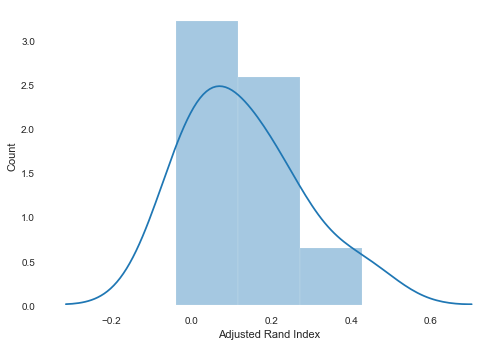

In [443]:
sns.distplot(ari_dist)
plt.xlabel("Adjusted Rand Index")
plt.ylabel("Count")
plt.show()